# <span style="color:blue"> Import Section  </span>

- **pandas**: used to create and manage data frame object.  
- **seaborn**: visualization  
- **pyplot**: visualize data components  
- **DecisionTreeClassifier**: Decision tree model implementation  
- **SVC**: support vector machine implementation  
- **GaussianNB**: naive Bayes implementation  
- **KNeighborsClassifier**: KNN implementation  
- **StandardScaler**: standardization library  
- **GridSearchCV**: search for best parameters  
- **train_test_split**: split data into train and t
- **accuracy_score, precision_score, recall_score, f1_score, classification_report**: calculate the model>accuracy  



In [1]:
# regular tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# machine learning tools 
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# <span style="color:blue"> Data Explorations Section   </span>
###### Summarize the key characteristics and 
###### distributions of the variables.

Information about the dataset:
a. Columns Overview:
1. <span style="color: blue">Numerical Columns: </span>
- battery_power: Ranges from 501 to 1998 with a mean of 1238.52.  
- clock_speed: Processor speed ranges from 0.5 GHz to 3 GHz.  
- int_memory: Internal memory ranges from 2 GB to 64 GB.  
- ram: RAM ranges from 256 MB to 3998 MB.  
- talk_time: Battery talk time ranges from 2 to 20 hours.

2. <span style="color: blue">Categorical/Binary Columns:  </span>
- blue: Bluetooth availability (0: No, 1: Yes).  
- dual_sim: Dual SIM support (0: No, 1: Yes).  
- four_g: 4G support (0: No, 1: Yes).  
- three_g: 3G support (0: No, 1: Yes).  
- touch_screen: Touch screen availability (0: No, 1: Yes).  
- wifi: Wi-Fi support (0: No, 1: Yes).

3. <span style="color: blue">Target Column:  </span>
- price_range: Categorical values (0 to 3) indicating the price range of the mobile phones.

4. <span style="color: blue">Other Features:  </span>
- fc and pc: Front and primary camera megapixels.  
- sc_h and sc_w: Screen height and width in cm.  
- px_height and px_width: Screen pixel resolution.  
- mobile_wt: Weight of the mobile phone in grams.  
- n_cores: Number of cores in the processor.  
- m_dep: Mobile depth in cm.


In [2]:
# read csv data file
data = pd.read_csv("data.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# print a dataset's dimension
column_number = len(data.columns)
row_number = len(data)
print(f"Column number : {column_number}\t Row number : {row_number}")

Column number : 21	 Row number : 2000


In [4]:
# describe data set
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


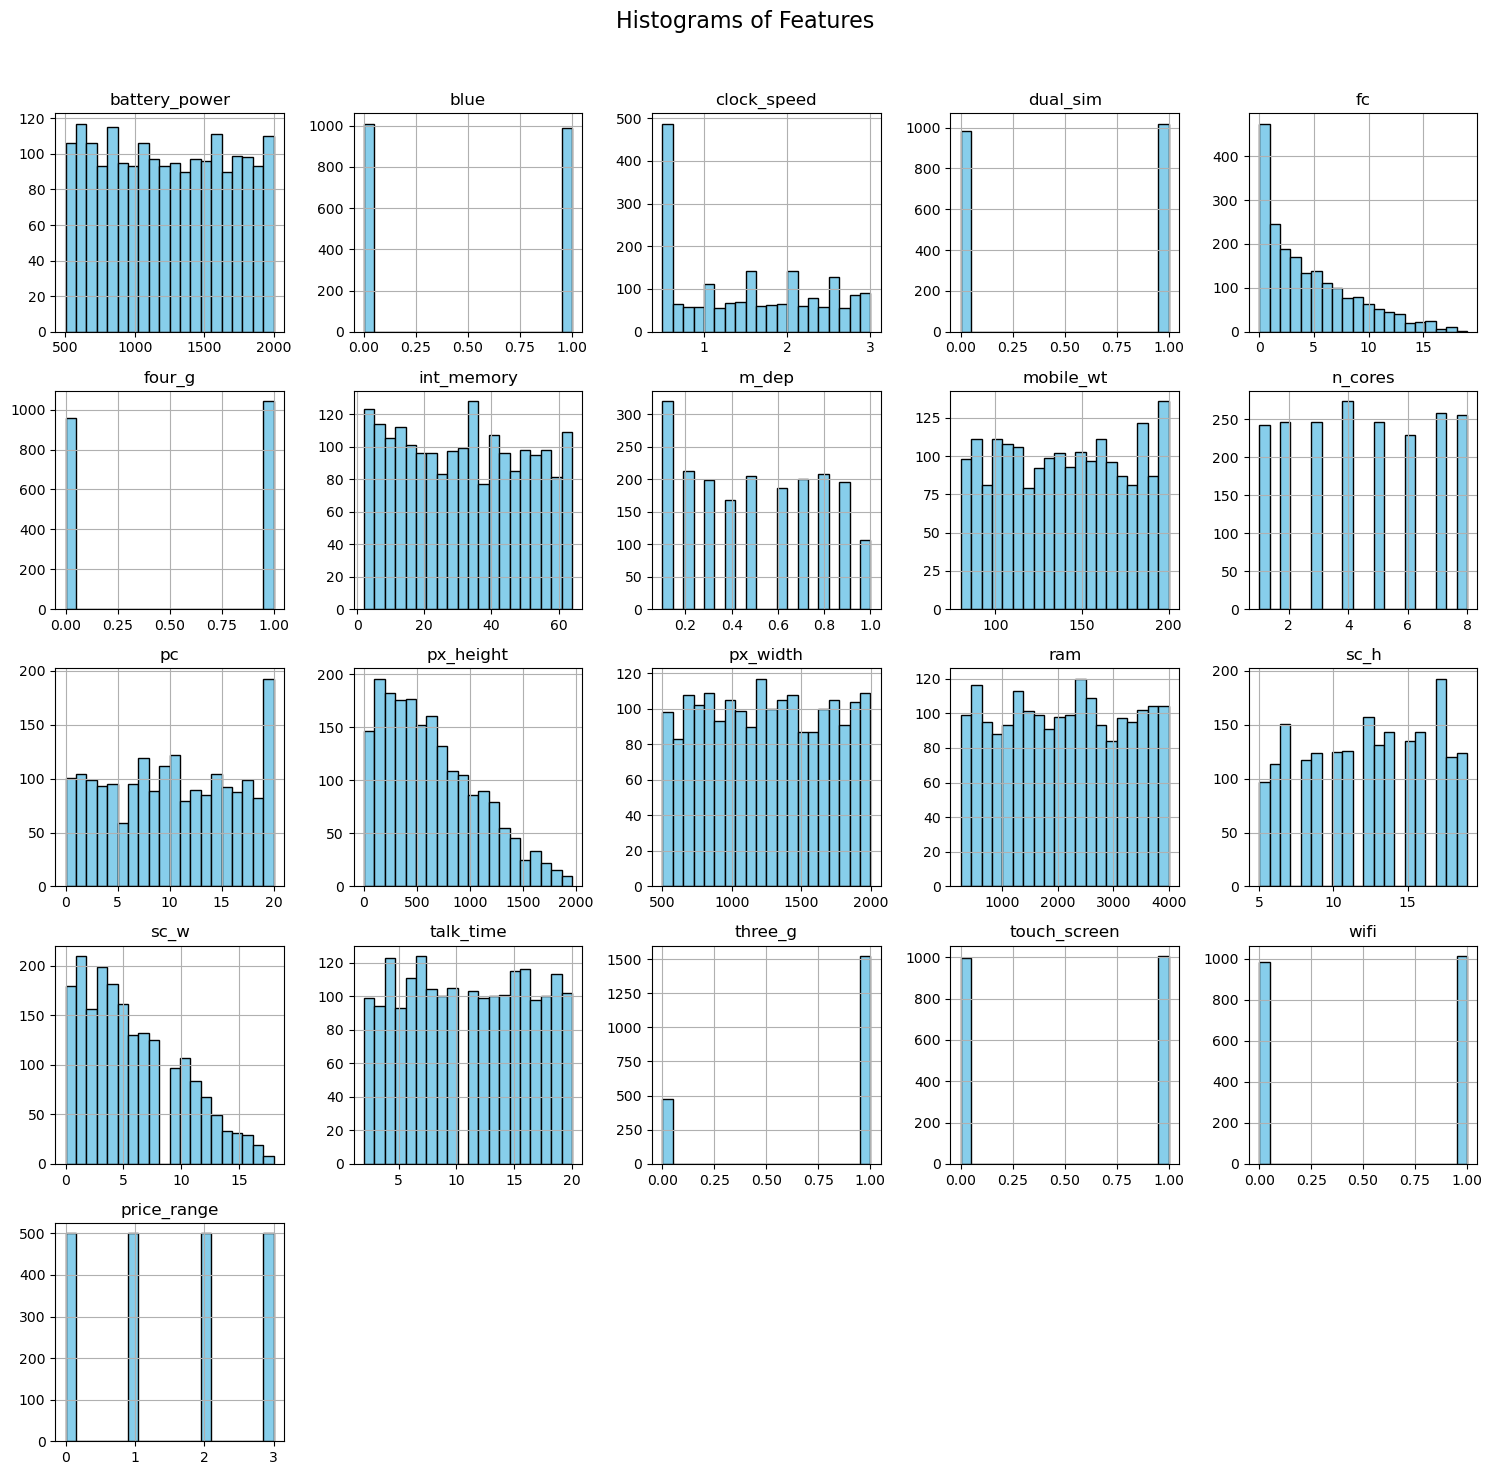

In [5]:
# show distributions for each feature using histogram
data.hist(figsize=(15, 15), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# <span style="color: blue">Cleaning Section  </span>
1. fill or remove null cells.
2. remove duplicate rows.
3. handel outliers.
4. dimention reduction.
5. standarize data.
6. Split into training and testing sets

### 1. fill or remove null cells. 

In [6]:
# count number of null cells
null_number = data.isnull().sum().sum()
print("Number of cells that contain a null value : ", null_number) # ouput: 0
# we don't have a null values

Number of cells that contain a null value :  0


### 2. remove duplicate rows.

In [7]:
# count number of duplicate rows
duplicate_number = data.duplicated().sum()
print("Number of duplicate row : ", duplicate_number) # output: 0
#we don't have a duplicate rows

Number of duplicate row :  0


### 3. handel outliers
- The best way i like to use is box plot is easy, simple and very effective.

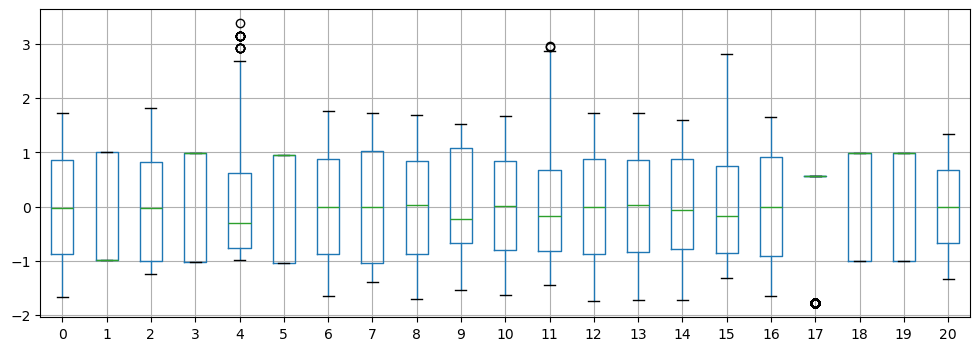

In [8]:
# set size of figure
plt.figure(figsize=(12, 4))

# standarize a data
scaler = StandardScaler()
data_stander = scaler.fit_transform(data)
# convert data from numpy to data frame
data_stander = pd.DataFrame(data_stander) 

# show plots for each column
data_stander.boxplot()
plt.show()

- there are three columns contain outliers
- show a range of column using box plot to get more information about outliers

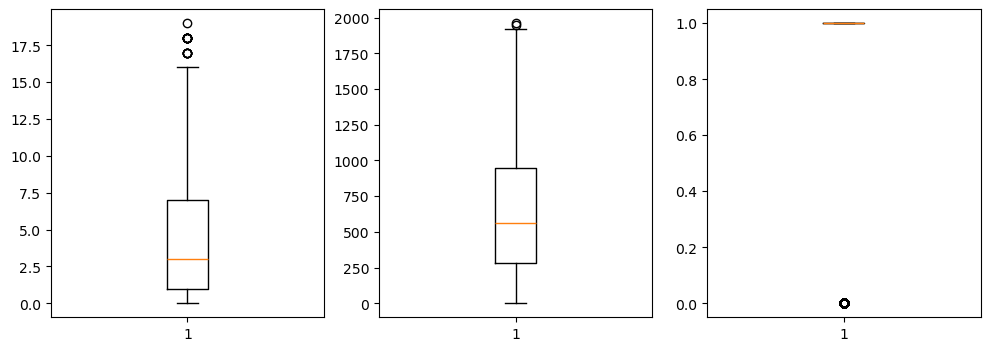

In [9]:
# show plots that contain out layer
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].boxplot(data["fc"])


axes[1].boxplot(data["px_height"])


axes[2].boxplot(data["three_g"])

plt.show()

In [10]:
# numboer of outliers for each column
# Q1 is a list of quantile 0.25 fo the three column so as Q3, but Q3 is list of 1uantile 0.75
Q1 = [data["fc"].quantile(0.25), data["px_height"].quantile(0.25), data["three_g"].quantile(0.25)]
Q3 = [data["fc"].quantile(0.75), data["px_height"].quantile(0.75), data["three_g"].quantile(0.75)]

# subtract Q1 list from Q3
IQR = [a - b for a, b in zip(Q3, Q1)]

# calculate upper and lower boundry list
lower_boundry = [a - (1.5 * b) for a, b in zip(Q1, IQR)]
upper_boundry = [a + (1.5 * b) for a, b in zip(Q3, IQR)]

# finally we can sellect outlier for eache column
outliers = {
    "fc": data["fc"][(data["fc"] > upper_boundry[0]) | (data["fc"] < lower_boundry[0])],
    "px_height": data["px_height"][(data["px_height"] > upper_boundry[1]) | (data["px_height"] < lower_boundry[1])],
    "three_g": data["three_g"][(data["three_g"] > upper_boundry[2]) | (data["three_g"] < lower_boundry[2])]
}

print(len(outliers.get("fc")))
print(len(outliers.get("px_height")))
print(len(outliers.get("three_g")))

18
2
477


#### 1. fc outliers

In [11]:
print(sorted(outliers.get("fc")))
print(f"upper boundrey is : {upper_boundry[0]}")

[17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19]
upper boundrey is : 16.0


In [12]:
# remove outlier 19 becouse is too hight is set it with 18 for example becouse will decrease a model acurecy 
data = data.drop(1709)
print(len(data["fc"]))

1999


#### 2. px_height outliers

In [13]:
print(sorted(outliers.get("px_height")))
print(f"upper boundrey is : {upper_boundry[1]}")
# the difference isn't that too mutch so i will keep it 

[1949, 1960]
upper boundrey is : 1944.0


#### 3. three_g outliers

In [14]:
print("number of outlires that = 0 : ", outliers.get("three_g")[outliers.get("three_g") == 0].count())
print("number of outlires overall : ", outliers.get("three_g").count())

number of outlires that = 0 :  477
number of outlires overall :  477


- that means all outliers are equals 0  
- I cann't remove outliers becouse is 25% of total data 
- the column three_g 0, 1 is not balanced the most of data is 1

### 4. Dimention reduction.

##### a) rename column.

In [15]:
data.rename(columns={
    'battery_power': 'battery_capacity',
    'clock_speed': 'processor_speed',
    'int_memory': 'internal_memory',
    'ram': 'ram_capacity',
    'blue': 'bluetooth',
    'price_range': 'price_category',
    'fc': 'front_camera',
    'pc': 'primary_camera',
    'sc_h': 'screen_height',
    'sc_w': 'screen_widt',
    'px_height': 'screen_pixel_height',
    'px_width': 'screen_pixel_width',
    'mobile_wt': 'mobile_weight',
    'n_cores': 'processor_cores',
    'm_dep': 'mobile_depth'
}, inplace=True)
data.sample()

,battery_capacity,bluetooth,processor_speed,dual_sim,front_camera,four_g,internal_memory,mobile_depth,mobile_weight,processor_cores,...,screen_pixel_height,screen_pixel_width,ram_capacity,screen_height,screen_widt,talk_time,three_g,touch_screen,wifi,price_category
1441,599,1,2.9,0,0,1,64,0.3,186,8,...,103,646,3396,5,3,7,1,0,0,2


##### b) reduse column number. 

In [16]:
# add new column will display price category as 0 for 0,1 (low price) and 1 for 2, 3(height price)
data["bool_price_category"] = [1 if price > 1 else 0 for price in data["price_category"]]

# display correlation between each column with other column
print(data.corr()["price_category"].drop(["price_category", "bool_price_category"]))

battery_capacity       0.199889
bluetooth              0.021252
processor_speed       -0.005770
dual_sim               0.018141
front_camera           0.020385
four_g                 0.014138
internal_memory        0.044090
mobile_depth           0.000625
mobile_weight         -0.030559
processor_cores        0.003382
primary_camera         0.032949
screen_pixel_height    0.148805
screen_pixel_width     0.165000
ram_capacity           0.916972
screen_height          0.023045
screen_widt            0.039475
talk_time              0.021139
three_g                0.023248
touch_screen          -0.029757
wifi                   0.019479
Name: price_category, dtype: float64


In [17]:
# column mobile_depth have a week correlation with price_category
# pixel height and width have more correlation than screen width and height so I drop width height and width 
data = data.drop(columns=['mobile_depth', 'screen_widt', 'screen_height'])

### 5. Data standarization

In [18]:
# store old data
old_data = data
# standarize data
#data = pd.DataFrame(scaler.fit_transform(data))
#data.columns = old_data.columns


### 6. Split into training and testing sets

In [19]:
# split feature from a dataset
x = data.drop(columns=["price_category", "bool_price_category"])

# split output from a dataset
y = old_data["price_category"]
# split boolean output from a dataset
by = old_data["bool_price_category"]

#split data into testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
bx_train, bx_test, by_train, by_test = train_test_split(x, by, test_size=0.2, random_state=42)

# <span style="color: blue">Modeling Section</span>
1. K-Nearest Neighbors (KNN)
2. Naive Bayes
3. Support Vector Machine (SVM)
4. Decision Tree

## 1. K-Nearest Neighbors (KNN)

#### 1. Implement the KNN algorithm using a suitable library (e.g., scikit-learn) with a range of k values.


#### 2. Train the model on the training set and evaluate its performance using appropriate evaluation metrics (e.g., accuracy,precision, recall, F1-score).

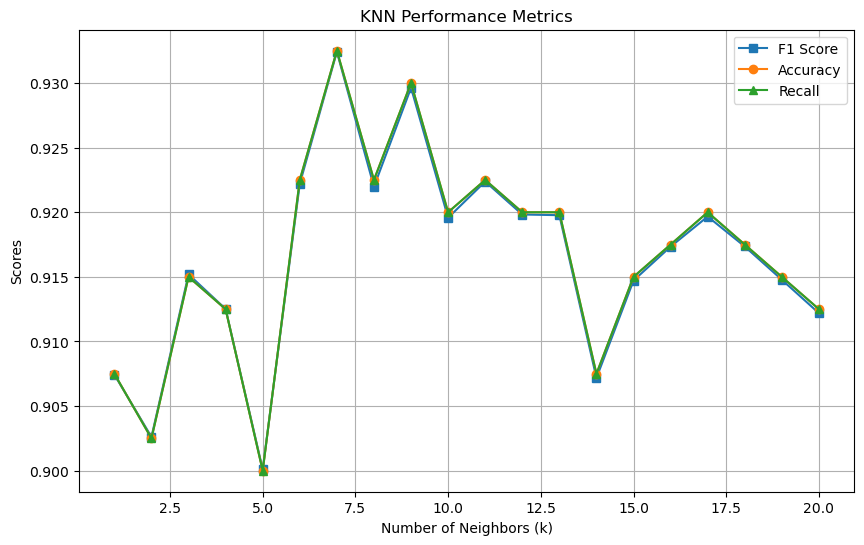

In [20]:
# max number of k 
k_range = 21

# initial list to hold result of different k  
knn_scores = {
    'accuracy_scores' : [],
    'f1_scores' : [],
    'recall_scores' : [],
}
# loop from 1 to k range finding the best and lowest posible k number 
for k in range(1, k_range):
    # implement the knn algorithm using k neighbors classifier lib
    # training step
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)

    # predect step
    y_predict = knn_model.predict(x_test)

    # calculate preformance for different number of k
    knn_scores.get('accuracy_scores').append(accuracy_score(y_test, y_predict))
    knn_scores.get('f1_scores').append(f1_score(y_test, y_predict, average='weighted'))
    knn_scores.get('recall_scores').append(recall_score(y_test, y_predict, average='weighted'))

# print(accuracy_scores)
# print(f1_scores)
# print(recall_scores)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, k_range), knn_scores.get('f1_scores'), label="F1 Score", marker='s')
plt.plot(range(1, k_range), knn_scores.get('accuracy_scores'), label="Accuracy", marker='o')
plt.plot(range(1, k_range), knn_scores.get('recall_scores'), label="Recall", marker='^')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Scores")
plt.title("KNN Performance Metrics")
plt.legend()
plt.grid()
plt.show()


#### 3. Experiment with different distance metrics and discuss their impact on the model’s performance.


#### from the result plot we conclude: 
- k number distribution starit with low accurecy , f1 and recall score (about 0.907)
- a distribution increase and decrease untile k = 7 we got the best score (about 0.94)
- the k number distribution start decrease
<br/>
<span style="color:green"> the best k number for this dataset is 7</span>


## 2. Naive Bayes

#### 1. Implement the Naive Bayes algorithm using a suitable library (e.g., scikitlearn).


In [21]:
# model training 
bool_naive_bayes_model = GaussianNB()
bool_naive_bayes_model.fit(bx_train, by_train)

GaussianNB()

#### 2. Train the model on the training set and evaluate its performance using appropriate evaluation metrics.


In [22]:
by_predict = bool_naive_bayes_model.predict(bx_test)
naive_bayes_scores = {
    'accuracy_scores' : [],
    'f1_scores' : [],
    'recall_scores' : [],
}
naive_bayes_scores.get('accuracy_scores').append(accuracy_score(by_test, by_predict))
naive_bayes_scores.get('f1_scores').append(f1_score(by_test, by_predict))
naive_bayes_scores.get('recall_scores').append(recall_score(by_test, by_predict))

print("accuracy score : %", naive_bayes_scores.get('accuracy_scores')[0].round(4) * 100)
print("f1 score : %", naive_bayes_scores.get('f1_scores')[0].round(4) * 100)
print("recall score : %", naive_bayes_scores.get('recall_scores')[0].round(4) * 100)

accuracy score : % 96.0
f1 score : % 96.1
recall score : % 96.57


#### 3. Apply the trained model to the testing set for predictions.


In [23]:
test_data = pd.DataFrame({
    'battery_capacity': [3500, 3000, 4000],        # Example battery capacities
    'bluetooth': [1, 0, 1],                        # Bluetooth: yes/no (1/0)
    'processor_speed': [2.3, 2.0, 2.5],            # Processor speeds
    'dual_sim': [1, 0, 1],                         # Dual sim: yes/no (1/0)
    'front_camera': [8, 12, 5],                    # Front camera megapixels
    'four_g': [1, 1, 0],                           # 4G support: yes/no (1/0)
    'internal_memory': [64, 32, 128],              # Internal memory (GB)
    'mobile_depth': [8.5, 8.2, 9.0],               # Mobile depth (mm)
    'mobile_weight': [180, 150, 200],              # Mobile weight (grams)
    'processor_cores': [8, 4, 6],                  # Processor cores
    'screen_pixel_height': [2400, 2200, 2560],     # Screen pixel height
    'screen_pixel_width': [1080, 720, 1440],       # Screen pixel width
    'ram_capacity': [6, 4, 8],                     # RAM capacity (GB)
    'talk_time': [12, 10, 14],                     # Talk time (hours)
    'three_g': [1, 1, 0],                          # 3G support: yes/no (1/0)
    'touch_screen': [1, 1, 1],                     # Touch screen: yes (1)
    'wifi': [1, 0, 1]                              # Wi-Fi support: yes/no (1/0)
})


test_data.head()

,battery_capacity,bluetooth,processor_speed,dual_sim,front_camera,four_g,internal_memory,mobile_depth,mobile_weight,processor_cores,screen_pixel_height,screen_pixel_width,ram_capacity,talk_time,three_g,touch_screen,wifi
0,3500,1,2.3,1,8,1,64,8.5,180,8,2400,1080,6,12,1,1,1
1,3000,0,2.0,0,12,1,32,8.2,150,4,2200,720,4,10,1,1,0
2,4000,1,2.5,1,5,0,128,9.0,200,6,2560,1440,8,14,0,1,1


In [24]:
test_data.columns = x_test.columns

# for boolean classification
predected_output = bool_naive_bayes_model.predict(test_data)
print("output of boolean classification : ", predected_output)

output of boolean classification :  [0 0 0]


## 3. Support Vector Machine (SVM)

#### 1. Implement the SVM algorithm using a suitable library (e.g., scikit-learn) with various hyperparameters.

In [25]:
# Create and train the model
# training step
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  
svm_model.fit(x_train, y_train)

SVC()

#### 2. Train the model on the training set and evaluate its performance using appropriate evaluation metrics (e.g., accuracy,
precision, recall, F1-score).

In [26]:
# testing step
y_predict = svm_model.predict(x_test)

svm_scores = {
    'accuracy_scores' : [],
    'f1_scores' : [],
    'recall_scores' : [],
}

svm_scores.get('accuracy_scores').append(accuracy_score(by_test, by_predict))
svm_scores.get('f1_scores').append(f1_score(by_test, by_predict))
svm_scores.get('recall_scores').append(recall_score(by_test, by_predict))

report_score = classification_report(y_test, y_predict)
print("accuracy score is : %", naive_bayes_scores.get('accuracy_scores')[0].round(4) * 100)
print(report_score)

accuracy score is : % 96.0
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.92      0.98      0.95       100
           2       0.97      0.88      0.92       104
           3       0.93      0.97      0.95       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



#### 3. Experiment with different kernel functions (e.g., linear, polynomial, radial basis function) and regularization
parameters to assess their impact on the model’s performance.

In [27]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Only for RBF kernel
    'degree': [3, 4],  # Degree of polynomial kernel
}
svm_scores = {
    'accuracy_scores' : [],
    'f1_scores' : [],
    'recall_scores' : [],
}

svm_output ={
    'C': [], 
    'kernel': [], 
    'gamma': [],
    'degree': [],
    'accuracy': [],
}

for kernel in param_grid.get('kernel'):
    for gamma in param_grid.get('gamma'):
        for degree in param_grid.get('degree'):
            for C in param_grid.get('C'):
                loop_svm_model = SVC(kernel=kernel, gamma=gamma, degree=degree, C=C)
                loop_svm_model.fit(x_train, y_train)

                y_predict = loop_svm_model.predict(x_test)
                accuracy = accuracy_score(y_test, y_predict)

                svm_output.get("kernel").append(kernel)
                svm_output.get("gamma").append(gamma)
                svm_output.get("degree").append(degree)
                svm_output.get("C").append(C)
                svm_output.get("accuracy").append(f"{accuracy:.3f}")

                svm_scores.get('accuracy_scores').append(accuracy)
                svm_scores.get('f1_scores').append(f1_score(by_test, by_predict))
                svm_scores.get('recall_scores').append(recall_score(by_test, by_predict))

svm_ouput_df = pd.DataFrame(svm_output)

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

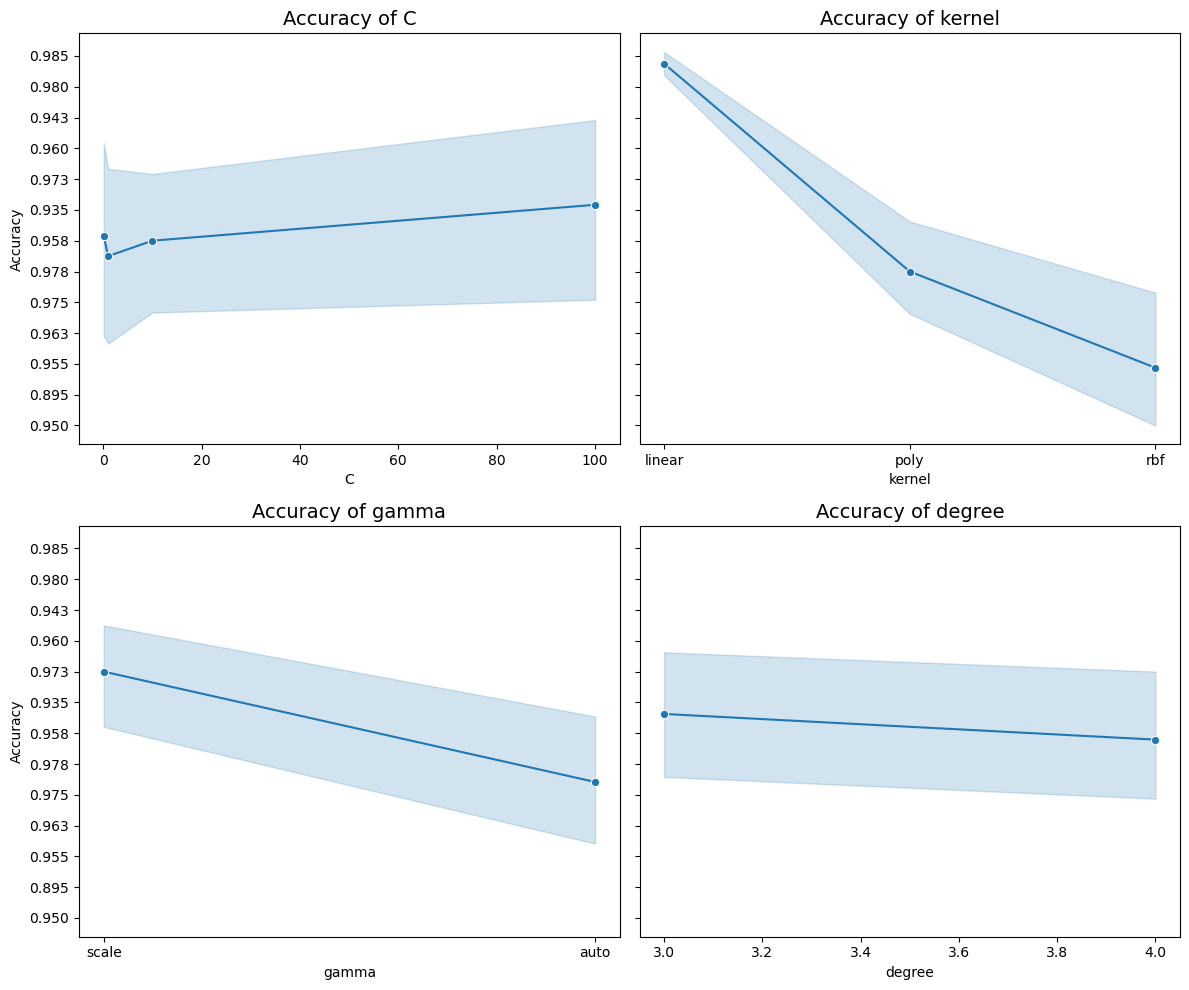

In [29]:
# Columns to plot against accuracy
columns_to_plot = svm_ouput_df.columns.drop('accuracy')

# Create subplots (2 rows, 2 columns)
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Flatten axes array to iterate over them easily
axes = axes.flatten()

# Iterate over each column to plot
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x=svm_ouput_df[column], y=svm_ouput_df['accuracy'], marker='o', ax=axes[i])
    axes[i].set_title(f'Accuracy of {column}', fontsize=14)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

#### 4. Tune the hyperparameters (e.g., C, gamma) using techniques like grid search or randomized search to optimize the
model's performance.

In [30]:
# training
svc_grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)
svc_grid_search.fit(x_train, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {svc_grid_search.best_params_}")
print(f"Best Cross-validation Score: {svc_grid_search.best_score_:.3f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Score: 0.972


#### 5. Select the best combination of hyperparameters based on performance metrics and apply the tuned  model to the 
testing set for predictions.

In [31]:
# train model with the best compination of  hyperparameters {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
# train model using all data set (x, y)
svm_model = svc_grid_search.best_estimator_
svm_model.fit(x, y)

# test data is previasly created sample
y_predict = svm_model.predict(test_data)
print(y_predict)

[1 0 3]


## 4. Decision Tree

#### 1. Implement the Decision Tree algorithm using a suitable library (e.g., scikit-learn).

In [32]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(bx_train, by_train)

DecisionTreeClassifier(max_depth=3)

#### 2. Train the model on the training set and evaluate its performance using appropriate evaluation metrics (e.g., accuracy, 
precision, recall, F1-score).

In [33]:
# testing step
by_predict = decision_tree_model.predict(bx_test)

decision_tree_scores = {
    'accuracy_scores' : [],
    'f1_scores' : [],
    'recall_scores' : [],
}

decision_tree_scores.get('accuracy_scores').append(accuracy_score(by_test, by_predict))
decision_tree_scores.get('f1_scores').append(f1_score(by_test, by_predict))
decision_tree_scores.get('recall_scores').append(recall_score(by_test, by_predict))

print("accuracy score : %", decision_tree_scores.get('accuracy_scores')[0].round(4) * 100)
print("f1 score : %", decision_tree_scores.get('f1_scores')[0].round(4) * 100)
print("recall score : %", decision_tree_scores.get('recall_scores')[0].round(4) * 100)

accuracy score : % 92.5
f1 score : % 92.65
recall score : % 92.65


#### 3. Experiment with different hyperparameters (e.g., max depth, min samples split, criterion) to analyze their impact on
performance.

In [34]:
# Define the parameter grid for tuning (for Decision Tree)
param_grid = {
    'max_depth': [3, 5, 10, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'criterion': ['gini', 'entropy'],  # Splitting criterion (Gini or Entropy)
}

decision_tree_scores = {
    'accuracy_scores' : [],
    'f1_scores' : [],
    'recall_scores' : [],
}

# Initialize a dictionary to store the results
decision_tree_output = {
    'max_depth': [], 
    'min_samples_split': [], 
    'criterion': [],
    'accuracy': [],
}

# Loop through all combinations of hyperparameters in the param_grid
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for criterion in param_grid['criterion']:
            # Initialize the DecisionTreeClassifier with the current hyperparameters
            loop_decision_tree_scores = DecisionTreeClassifier(
                max_depth=max_depth, 
                min_samples_split=min_samples_split, 
                criterion=criterion, 
                random_state=42
            )
            
            # Fit the model
            loop_decision_tree_scores.fit(x_train, y_train)
            
            # Predict using the model
            y_predict = loop_decision_tree_scores.predict(x_test)
            
            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_predict)
            
            # Append the results to the output dictionary
            decision_tree_output['max_depth'].append(max_depth)
            decision_tree_output['min_samples_split'].append(min_samples_split)
            decision_tree_output['criterion'].append(criterion)
            decision_tree_output['accuracy'].append(f"{accuracy:.3f}")  # Format accuracy to 3 decimal places

            decision_tree_scores.get('accuracy_scores').append(accuracy)
            decision_tree_scores.get('f1_scores').append(f1_score(by_test, by_predict))
            decision_tree_scores.get('recall_scores').append(recall_score(by_test, by_predict))

# Convert the output dictionary into a DataFrame for easier analysis
decision_tree_output_df = pd.DataFrame(decision_tree_output)

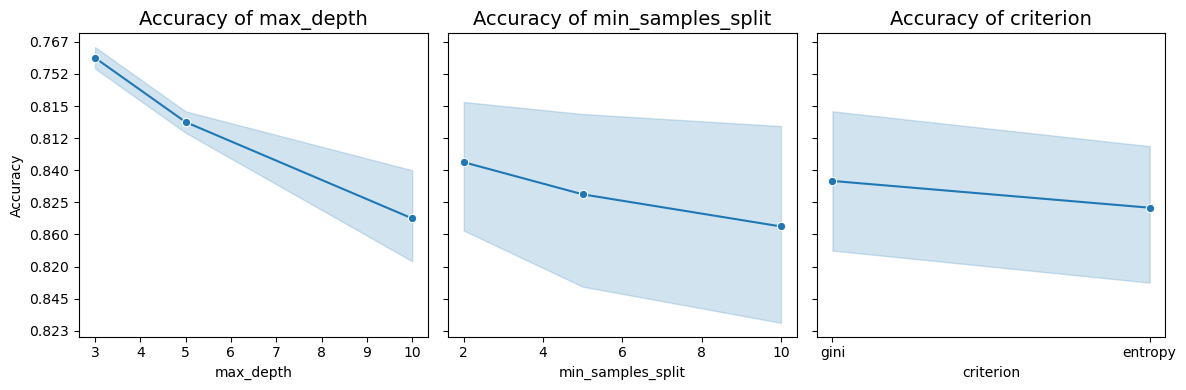

In [35]:
# Columns to plot against accuracy (excluding 'accuracy')
columns_to_plot = decision_tree_output_df.columns.drop('accuracy')

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Flatten axes array to iterate over them easily
axes = axes.flatten()

# Iterate over each column to plot
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x=decision_tree_output_df[column], y=decision_tree_output_df['accuracy'], marker='o', ax=axes[i])
    axes[i].set_title(f'Accuracy of {column}', fontsize=14)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

#### 4. Use techniques like grid search or randomized search to optimize the model’s performance.

In [36]:
# Set up the GridSearchCV
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
decision_tree_grid_search.fit(x_train, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {decision_tree_grid_search.best_params_}")
print(f"Best Cross-validation Score: {decision_tree_grid_search.best_score_:.3f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best Cross-validation Score: 0.850


#### 5. Visualize the decision tree structure and interpret the splits to provide insights.

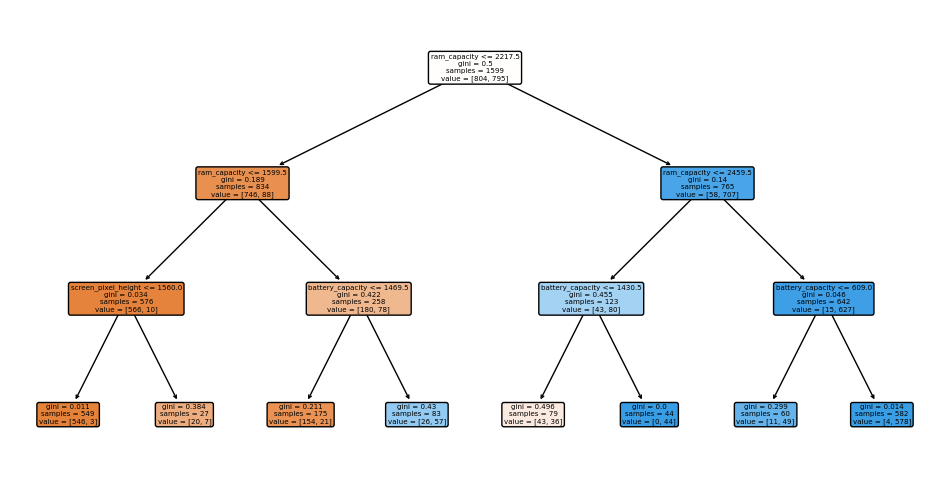

In [37]:
# Plot the decision tree
plt.figure(figsize=(12,6))  # Adjust the size as needed
plot_tree(decision_tree_model, feature_names=list(x_train.columns), filled=True, rounded=True)
plt.show()

#### 6. Apply the best-performing Decision Tree model to the testing set for predictions.

In [38]:
# Evaluate the best model on the test set
best_model = decision_tree_grid_search.best_estimator_
y_predict = best_model.predict(x_test)

# Output the accuracy on the test set
accuracy = accuracy_score(y_test, y_predict)
print(f"Test Set Accuracy: {accuracy:.3f}")

Test Set Accuracy: 0.845


# <span style="color:blue">Comparative Analysis<span>

#### 1. Compare the performance of the four algorithms (KNN, Naive Bayes, SVM, and Decision Tree) based on the evaluation metrics obtained

In [39]:
print(f"The best accuracy for 'Support Vector Machine' : %", max(svm_scores.get('accuracy_scores')).round(4)*100)
print(f"The best accuracy for 'Naive Bayes' : %", max(naive_bayes_scores.get('accuracy_scores')).round(4)*100)
print(f"The best accuracy for 'KNN' : %", max(knn_scores.get('accuracy_scores')).round(4)*100)
print(f"The best accuracy for 'Decision Tree' : %", max(decision_tree_scores.get('accuracy_scores')).round(4)*100)

The best accuracy for 'Support Vector Machine' : % 98.75
The best accuracy for 'Naive Bayes' : % 96.0
The best accuracy for 'KNN' : % 93.25
The best accuracy for 'Decision Tree' : % 86.25


#### 2. Discuss the strengths and weaknesses of each algorithm in the context of your dataset

### <span style="color:brown">1. Support Vector Machine<span>
#### <span style="color:blue">11. strength<span>
- ##### height accuracy have the best accuracy(98.75) in this study case .
#### <span style="color:red">12. weakness<span>
- ##### is very complecated and take time .
### <span style="color:brown">2. Naive Bayes<span>
#### <span style="color:blue">21. strength<span>
- #### simple .
#### <span style="color:red">22. weakness<span>
- #### not that accuret model .
### <span style="color:brown">3. KNN<span>
#### <span style="color:blue">31. strength<span>
- ##### zero training time .
- ##### can be applied for categoral data not only boolean like decision tree .
#### <span style="color:red">32. weakness<span>
- #### testing step will take time .
### <span style="color:brown">4. Decision Tree<span>
#### <span style="color:blue">41. strength<span>
- #### simple and little bit accurate .
#### <span style="color:red">42. weakness<span>
- #### can be only applied on boolean data .

### 3. Provide insights into which algorithm performs better in achieving the prediction objective.

#### The best model for this study case is SVM, but it is too complicated and takes time. Naive Bayes is also a good option.